In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [3]:
train_data = pd.read_csv('train.csv')

# Exploratory Analysis

In [4]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [5]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [7]:
train_data_subset = train_data[['employee_id', 'department', 'education', 'gender', 'age', 'previous_year_rating','is_promoted']]
train_data_subset

,employee_id,department,education,gender,age,previous_year_rating,is_promoted
0,65438,Sales & Marketing,Master's & above,f,35,5.0,0
1,65141,Operations,Bachelor's,m,30,5.0,0
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,0
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,0
4,48945,Technology,Bachelor's,m,45,3.0,0
...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,0
54804,74592,Operations,Master's & above,f,37,2.0,0
54805,13918,Analytics,Bachelor's,m,27,5.0,0
54806,13614,Sales & Marketing,NaN,m,29,1.0,0


In [8]:
train_data.info

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings 

In [9]:
train_data_subset.info

<bound method DataFrame.info of        employee_id         department         education gender  age  \
0            65438  Sales & Marketing  Master's & above      f   35   
1            65141         Operations        Bachelor's      m   30   
2             7513  Sales & Marketing        Bachelor's      m   34   
3             2542  Sales & Marketing        Bachelor's      m   39   
4            48945         Technology        Bachelor's      m   45   
...            ...                ...               ...    ...  ...   
54803         3030         Technology        Bachelor's      m   48   
54804        74592         Operations  Master's & above      f   37   
54805        13918          Analytics        Bachelor's      m   27   
54806        13614  Sales & Marketing               NaN      m   29   
54807        51526                 HR        Bachelor's      m   27   

       previous_year_rating  is_promoted  
0                       5.0            0  
1                       5.0  

## Checks for Missing Values & Categorical Value Check

In [10]:
train_data_subset.isna().sum()

employee_id                0
department                 0
education               2409
gender                     0
age                        0
previous_year_rating    4124
is_promoted                0
dtype: int64

In [11]:
train_data_subset['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [12]:
train_data_subset['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [13]:
train_data_subset[train_data_subset['education'].isna()]

,employee_id,department,education,gender,age,previous_year_rating,is_promoted
10,29934,Technology,NaN,m,30,NaN,0
21,33332,Operations,NaN,m,41,4.0,0
32,35465,Sales & Marketing,NaN,f,24,1.0,0
43,17423,Sales & Marketing,NaN,m,24,2.0,0
82,66013,Sales & Marketing,NaN,m,25,3.0,0
...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,NaN,f,35,3.0,0
54717,7684,Analytics,NaN,m,32,3.0,0
54729,1797,HR,NaN,f,28,3.0,0
54742,38935,Sales & Marketing,NaN,m,28,4.0,0


In [14]:
train_data_subset[train_data_subset['previous_year_rating'].isna()]

,employee_id,department,education,gender,age,previous_year_rating,is_promoted
10,29934,Technology,NaN,m,30,NaN,0
23,71177,Procurement,Bachelor's,m,27,NaN,0
29,74759,Sales & Marketing,Bachelor's,m,26,NaN,0
56,45709,Sales & Marketing,Bachelor's,f,29,NaN,0
58,26599,Sales & Marketing,Bachelor's,m,27,NaN,0
...,...,...,...,...,...,...,...
54703,74615,R&D,Bachelor's,m,30,NaN,0
54734,11685,Operations,Bachelor's,m,31,NaN,1
54746,10546,Finance,Bachelor's,m,28,NaN,0
54773,37919,Finance,Bachelor's,m,23,NaN,0


## Basic Statistics

In [15]:
train_data_subset.describe()

,employee_id,age,previous_year_rating,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000
mean,39195.830627,34.803915,3.329256,0.085170
std,22586.581449,7.660169,1.259993,0.279137
min,1.000000,20.000000,1.000000,0.000000
25%,19669.750000,29.000000,3.000000,0.000000
50%,39225.500000,33.000000,3.000000,0.000000
75%,58730.500000,39.000000,4.000000,0.000000
max,78298.000000,60.000000,5.000000,1.000000


## Visualizations of Major Variables

array([[<AxesSubplot: title={'center': 'employee_id'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'previous_year_rating'}>,
        <AxesSubplot: title={'center': 'is_promoted'}>]], dtype=object)

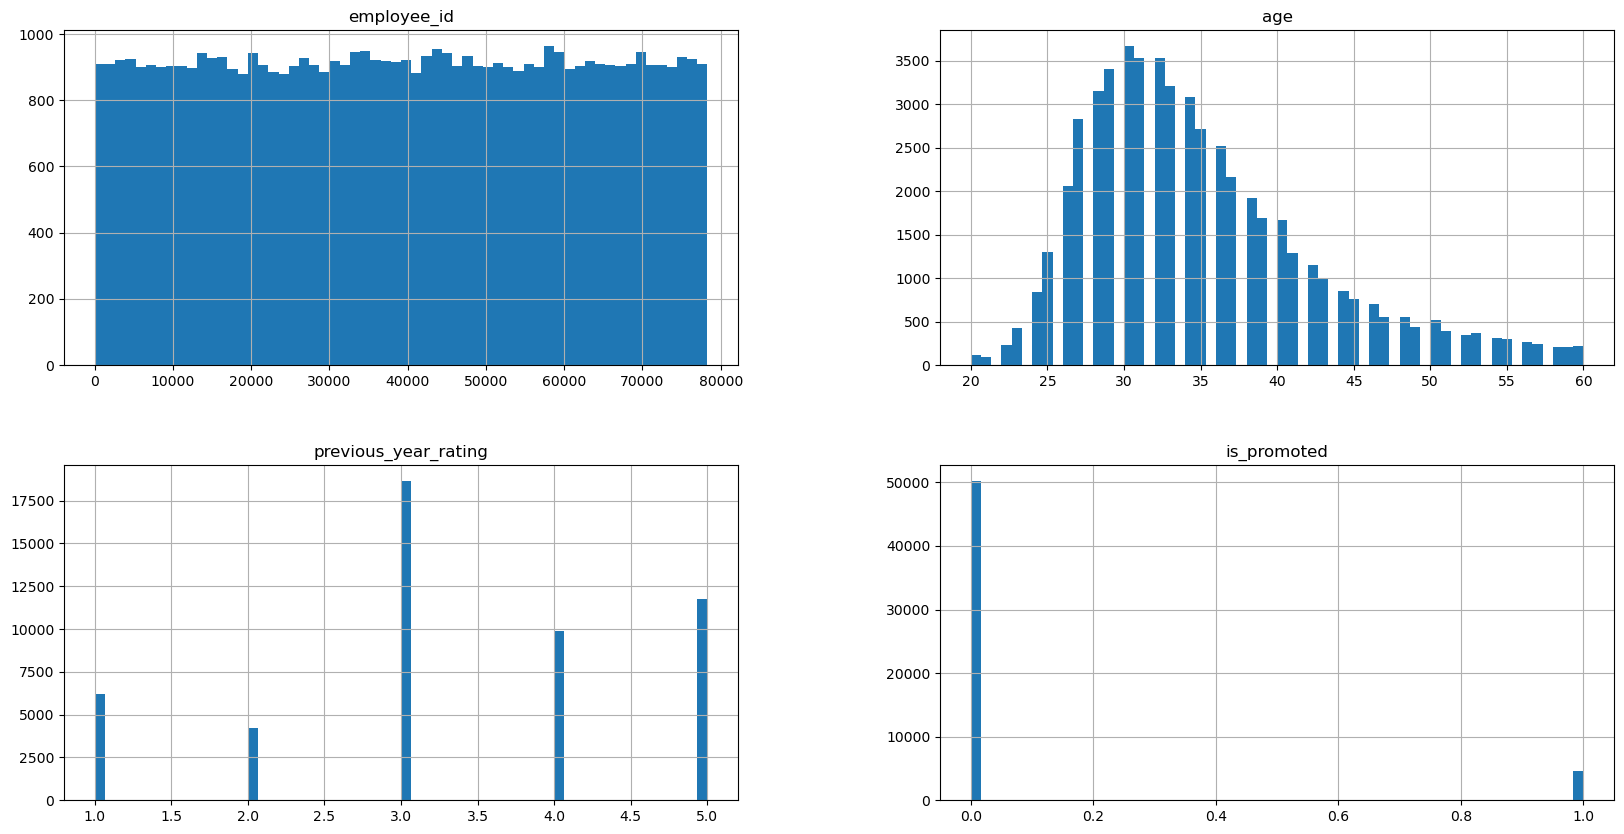

In [16]:
train_data_subset.hist(bins=60, figsize=(20,10))

<AxesSubplot: xlabel='employee_id', ylabel='age'>

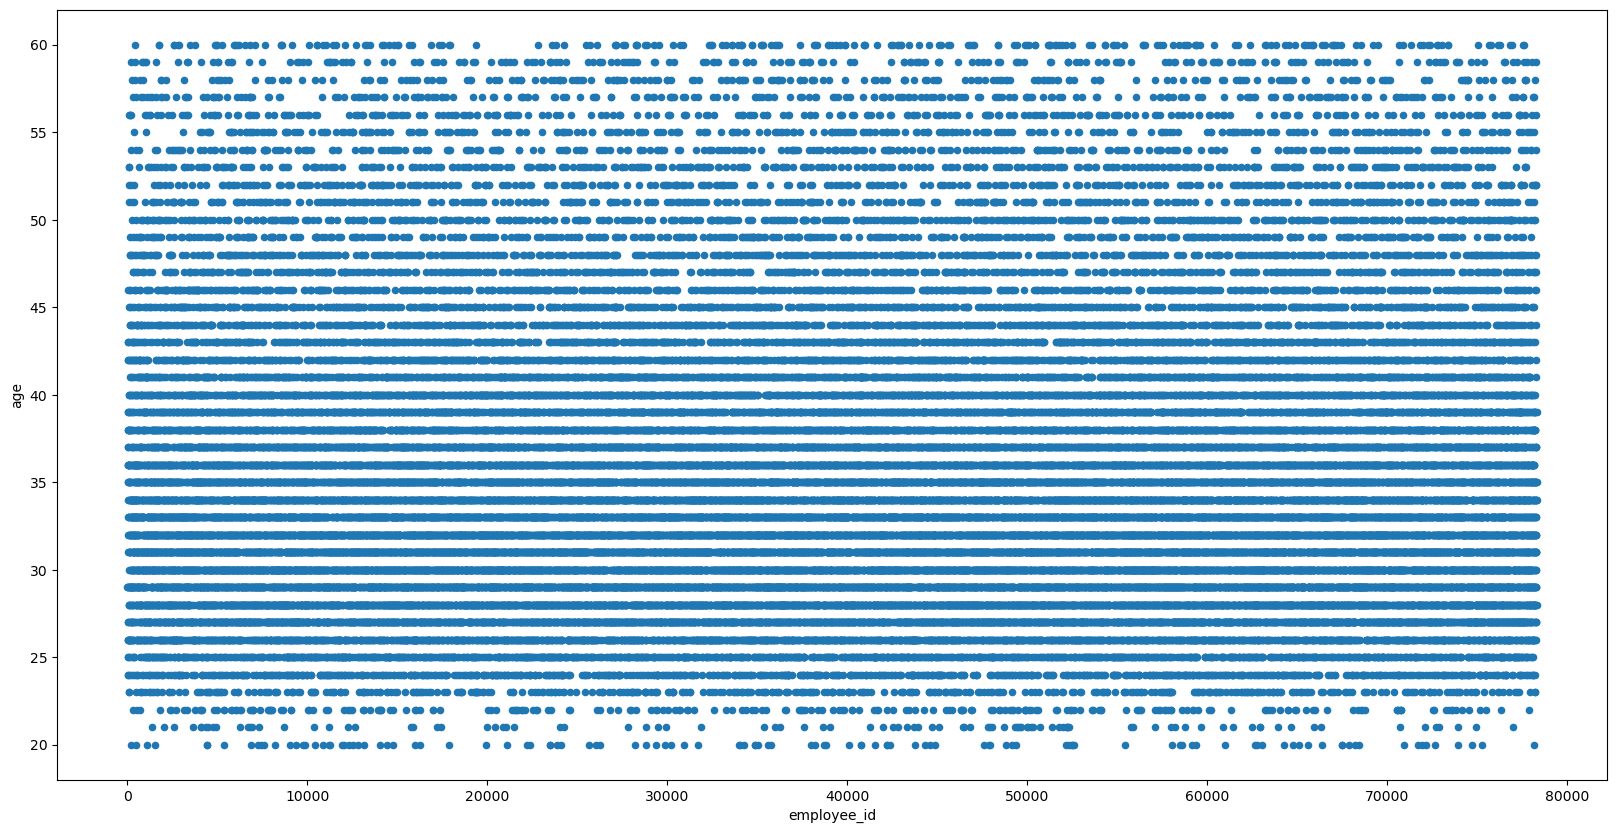

In [17]:
train_data_subset[['employee_id', 'age']].plot(kind='scatter', x='employee_id', y='age', figsize=(20,10))

# Data Wrangling / Cleansing

In [18]:
# mask = ((train_data_subset['column-name']=='value-name') | (train_data_subset['column-name']=='value-name'))

In [19]:
train_data_subset.fillna('Not Applicable')

,employee_id,department,education,gender,age,previous_year_rating,is_promoted
0,65438,Sales & Marketing,Master's & above,f,35,5.0,0
1,65141,Operations,Bachelor's,m,30,5.0,0
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,0
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,0
4,48945,Technology,Bachelor's,m,45,3.0,0
...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,0
54804,74592,Operations,Master's & above,f,37,2.0,0
54805,13918,Analytics,Bachelor's,m,27,5.0,0
54806,13614,Sales & Marketing,Not Applicable,m,29,1.0,0


In [20]:
train_data_subset.isna().sum()

employee_id                0
department                 0
education               2409
gender                     0
age                        0
previous_year_rating    4124
is_promoted                0
dtype: int64

In [21]:
train_data_subset[train_data_subset['education'].isna()]

,employee_id,department,education,gender,age,previous_year_rating,is_promoted
10,29934,Technology,NaN,m,30,NaN,0
21,33332,Operations,NaN,m,41,4.0,0
32,35465,Sales & Marketing,NaN,f,24,1.0,0
43,17423,Sales & Marketing,NaN,m,24,2.0,0
82,66013,Sales & Marketing,NaN,m,25,3.0,0
...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,NaN,f,35,3.0,0
54717,7684,Analytics,NaN,m,32,3.0,0
54729,1797,HR,NaN,f,28,3.0,0
54742,38935,Sales & Marketing,NaN,m,28,4.0,0


In [22]:
train_data_subset['education'].fillna('Not Provided', inplace=True)
train_data_subset['previous_year_rating'].fillna(3.0, inplace=True)

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29749/4182700837.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29749/4182700837.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
train_data_subset.isna().sum()

employee_id             0
department              0
education               0
gender                  0
age                     0
previous_year_rating    0
is_promoted             0
dtype: int64

## Success in updating all NaN!

In [24]:
# import seaborn as sb

In [25]:
# tx = sb.barplot(data=train_data, x="department", y="is_promoted", hue="gender")

In [26]:
# tx.set_xticklabels(tx.get_xticklabels(), rotation=90)
# tx.figure

In [27]:
# tx2 = sb.barplot(data=train_data, x="education", y="is_promoted", hue="gender")

In [28]:
# tx3 = sb.barplot(data=train_data, x="previous_year_rating", y="is_promoted", hue="gender")

In [29]:
# train_data_subset.corr()

In [30]:
# sb.heatmap(train_data.corr());

In [31]:
# tx4 = sb.barplot(data=train_data, x="awards_won?", y="is_promoted", hue="gender")

In [32]:
# tx5 = sb.barplot(data=train_data, x="previous_year_rating", y="length_of_service", hue="gender")

In [33]:
# tx6 = sb.barplot(data=train_data, x="age", y="length_of_service", hue="gender")

In [34]:
# tx6.set_xticklabels(tx6.get_xticklabels(), rotation=90)
# tx6.figure